In [170]:
import pandas as pd
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

plt.style.use('ggplot')

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Dropout
from tensorflow.keras.optimizers import Adam


In [171]:
tweet = pd.read_csv('/content/oxygen_related_COVID_tweets.csv')

In [172]:
tweet1 = pd.read_csv('/content/oxygen_related_COVID_tweets.csv')

In [173]:
tweet.head()

Unnamed: 0                                               text  label
0           0  @jackmathers4 @JaniceDean How about the vaccin...    0.0
1           1  @fordnation Imagine the most populous province...   -1.0
2           2  @arunbajpairajan Ye bhi nhi pta hota ki iopec ...   -1.0
3           3  @CalapooiaRiver @patteepoo @Ilovezaatar @DC_Dr...    0.0
4           4      @NotHoodlum Or in a wheelchair....with Oxygen    0.0

In [174]:
tweet.shape

(79799, 3)

In [175]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79799 entries, 0 to 79798
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  79799 non-null  int64  
 1   text        79798 non-null  object 
 2   label       315 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.8+ MB


In [176]:
bool_series=pd.isnull(tweet['text'])

In [177]:
tweet[bool_series]

Unnamed: 0 text  label
14862       14862  NaN    NaN

In [178]:
tweet.drop(14862, axis=0, inplace=True)

In [179]:
bool_series=pd.isnull(tweet1['text'])
tweet1[bool_series]
tweet1.dropna(inplace=True)
tweet1=tweet1.dropna().reset_index(drop=True)

In [180]:
tweet2 = tweet[tweet.isna().any(axis=1)]

In [181]:
tweet2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79483 entries, 73 to 79798
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  79483 non-null  int64  
 1   text        79483 non-null  object 
 2   label       0 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ MB


In [182]:
tweet2

Unnamed: 0                                               text  label
73             73  @bogipratomo Dospundi niki dok, kasus memuncak...    NaN
97             97  pastu trus buat cpr, oxygen semua . tkde respo...    NaN
121           121  @RobbieGmarc Skaffa en pulsoxymeter och ha kol...    NaN
157           157  ଦେଶରେ ୧୦୦ ରୁ ମାତ୍ର ୧୫ ପ୍ରତିଶତ #OxygenCylinders...    NaN
168           168  Ek bimari ne sabko oxygen ki keemat bta di... ...    NaN
...           ...                                                ...    ...
79794       79794  @msisodia ? Will You Utter A Word On #OxygenCh...    NaN
79795       79795  Hi,I'd really appreciate it if you would share...    NaN
79796       79796            Aap is doing black msrketing of oxygen।    NaN
79797       79797  Hey there,I'm a social worker.I'm helping peop...    NaN
79798       79798  #Germany has sent an #OxygenPlant with the cap...    NaN

[79483 rows x 3 columns]

In [183]:
tweet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  315 non-null    int64  
 1   text        315 non-null    object 
 2   label       315 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.5+ KB


In [184]:
tweet1

Unnamed: 0                                               text  label
0             0  @jackmathers4 @JaniceDean How about the vaccin...    0.0
1             1  @fordnation Imagine the most populous province...   -1.0
2             2  @arunbajpairajan Ye bhi nhi pta hota ki iopec ...   -1.0
3             3  @CalapooiaRiver @patteepoo @Ilovezaatar @DC_Dr...    0.0
4             4      @NotHoodlum Or in a wheelchair....with Oxygen    0.0
..          ...                                                ...    ...
310         413  Name : Sanjay Gupta Number : 8303201364 Requir...    1.0
311         414  @srinivasiyc Sir, a colleague's parents (79 &a...    1.0
312         415  @msisodia @ArvindKejriwal Sir jab logo ko oxyg...    0.0
313         416  Many in this covid crisis are left with only o...    0.0
314         417  One cow to be sent to every patient in ICU bec...    0.0

[315 rows x 3 columns]

In [185]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79798 entries, 0 to 79798
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  79798 non-null  int64  
 1   text        79798 non-null  object 
 2   label       315 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ MB


In [186]:
plt.rcParams['figure.figsize'] = [10,5]
plt.rcParams['figure.dpi'] = 120

Text(0.5, 1.0, 'not-relevant or not-help-seeking or help-seeking')

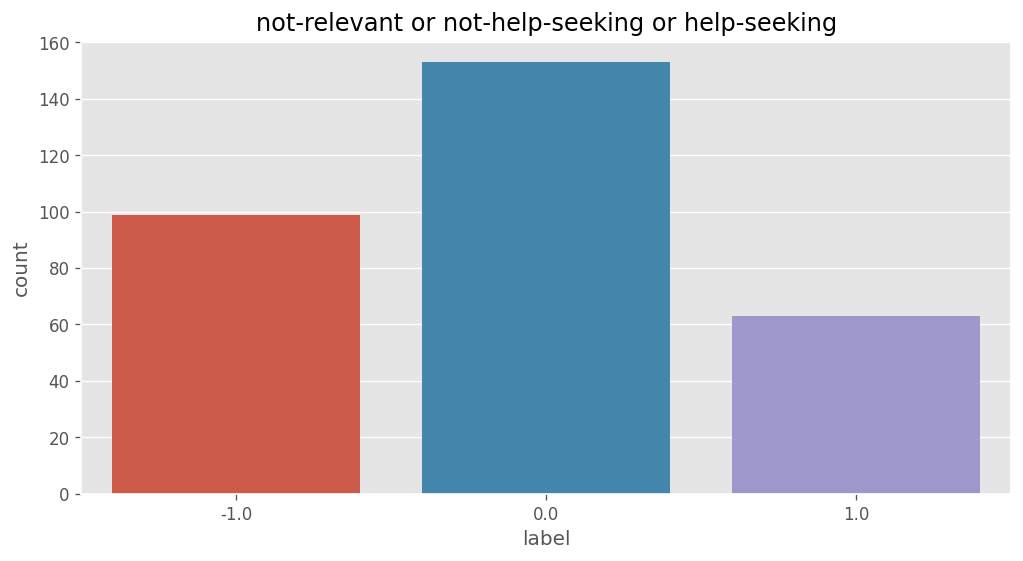

In [187]:
sns.countplot('label', data = tweet)
plt.title('not-relevant or not-help-seeking or help-seeking')

In [188]:
tweet['label'].value_counts()

 0.0    153
-1.0     99
 1.0     63
Name: label, dtype: int64

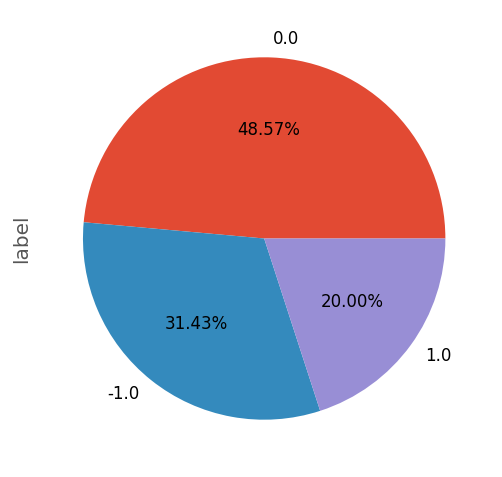

In [189]:
tweet['label'].value_counts().plot.pie(autopct='%1.2f%%')

number of character distribution in tweet data

In [190]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-phus7f_l
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-phus7f_l
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 9ca68d37027af9f6a30d54640347ce3b2e2694b3
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11755 sha256=da8521274e50e27fff8bb0ac8711a2337059beb21221af245c3fb77b1ece64ee
  Stored in directory: /tmp/pip-ephem-wheel-cache-f3534pfr/wheels/fd/71/47/e04f208ad659a295ccb69022e14de7d20ccc6fc30a5a935f09
Successfully built preprocess-kgptalkie
  Attempting uninstall: preprocess-kgptalkie
    Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfu

In [191]:
import preprocess_kgptalkie as kgp

In [192]:
kgp.get_basic_features(tweet)

Unnamed: 0                                               text  label  \
0               0  @jackmathers4 @JaniceDean How about the vaccin...    0.0   
1               1  @fordnation Imagine the most populous province...   -1.0   
2               2  @arunbajpairajan Ye bhi nhi pta hota ki iopec ...   -1.0   
3               3  @CalapooiaRiver @patteepoo @Ilovezaatar @DC_Dr...    0.0   
4               4      @NotHoodlum Or in a wheelchair....with Oxygen    0.0   
...           ...                                                ...    ...   
79794       79794  @msisodia ? Will You Utter A Word On #OxygenCh...    NaN   
79795       79795  Hi,I'd really appreciate it if you would share...    NaN   
79796       79796            Aap is doing black msrketing of oxygen।    NaN   
79797       79797  Hey there,I'm a social worker.I'm helping peop...    NaN   
79798       79798  #Germany has sent an #OxygenPlant with the cap...    NaN   

       char_counts  word_counts  avg_wordlength  stopwords_counts  \
0              107           19        5.631579                 7   
1              120           19        6.315789                 5   
2              106           23        4.608696                 1   
3              142           22        6.454545                 6   
4               40            6        6.666667                 2   
...            ...          ...             ...               ...   
79794           64           13        4.923077                 0   
79795          233           44        5.295455                20   
79796           33            7        4.714286                 3   
79797          239           37        6.459459                 8   
79798          264           38        6.947368                 9   

       hashtag_counts  mentions_counts  digits_counts  uppercase_counts  
0                   0                2              2                 0  
1                   1                1              3                 0  
2                   0                1              3                 0  
3                   0                7              2                 1  
4                   0                1              1                 0  
...               ...              ...            ...               ...  
79794               1                1              0                 2  
79795               0                0              7                 1  
79796               0                0              0                 0  
79797               0                3              5                 5  
79798               5                2              8                 2  

[79798 rows x 11 columns]

In [193]:
tweet=kgp.get_basic_features(tweet)

In [194]:
tweet.head()

Unnamed: 0                                               text  label  \
0           0  @jackmathers4 @JaniceDean How about the vaccin...    0.0   
1           1  @fordnation Imagine the most populous province...   -1.0   
2           2  @arunbajpairajan Ye bhi nhi pta hota ki iopec ...   -1.0   
3           3  @CalapooiaRiver @patteepoo @Ilovezaatar @DC_Dr...    0.0   
4           4      @NotHoodlum Or in a wheelchair....with Oxygen    0.0   

   char_counts  word_counts  avg_wordlength  stopwords_counts  hashtag_counts  \
0          107           19        5.631579                 7               0   
1          120           19        6.315789                 5               1   
2          106           23        4.608696                 1               0   
3          142           22        6.454545                 6               0   
4           40            6        6.666667                 2               0   

   mentions_counts  digits_counts  uppercase_counts  
0                2              2                 0  
1                1              3                 0  
2                1              3                 0  
3                7              2                 1  
4                1              1                 0

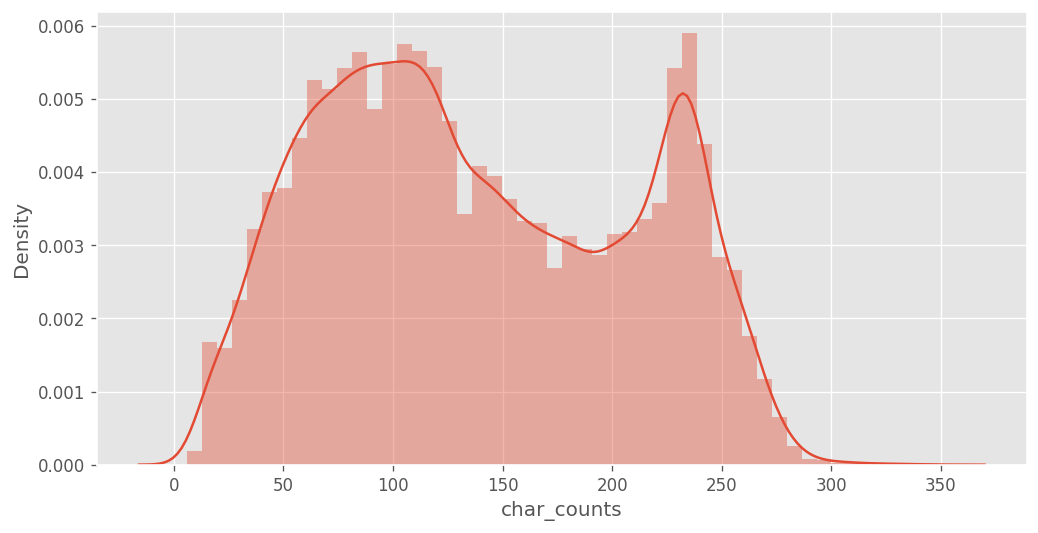

In [195]:
sns.distplot(tweet['char_counts'])

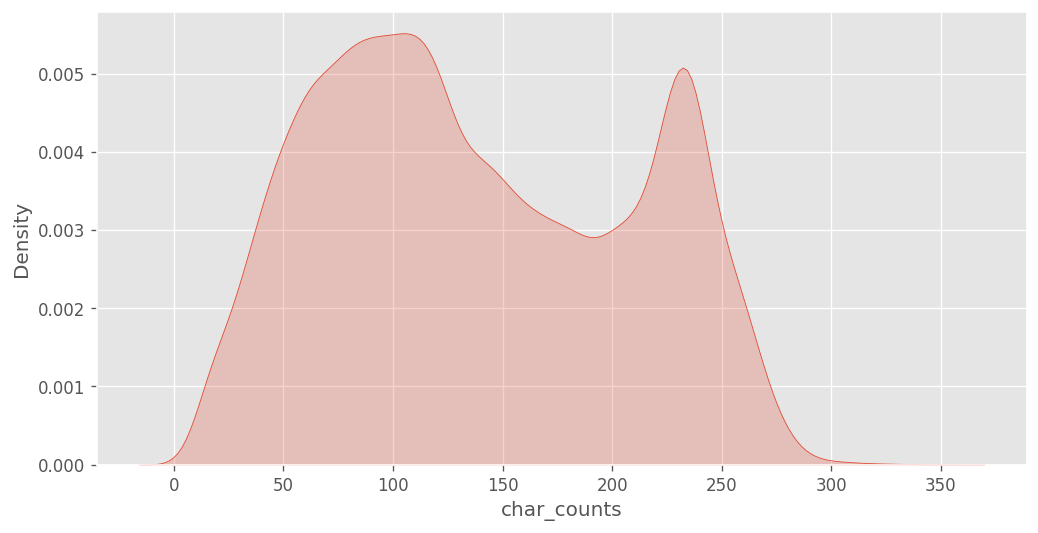

In [196]:
sns.kdeplot(tweet['char_counts'], shade=True)

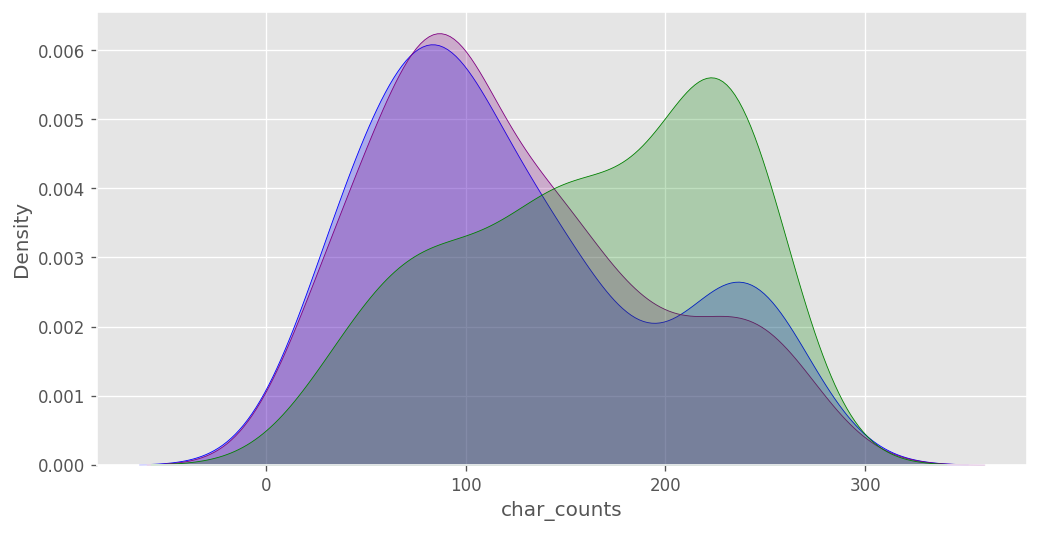

In [197]:
sns.kdeplot(tweet[tweet['label']==-1]['char_counts'], shade=True, color='blue') #blue shade for irrelevant tweets
sns.kdeplot(tweet[tweet['label']==0]['char_counts'], shade=True, color='purple') #purple shade for not-help-seeking-tweets
sns.kdeplot(tweet[tweet['label']==1]['char_counts'], shade=True, color='green') #green shade for help seeking tweets

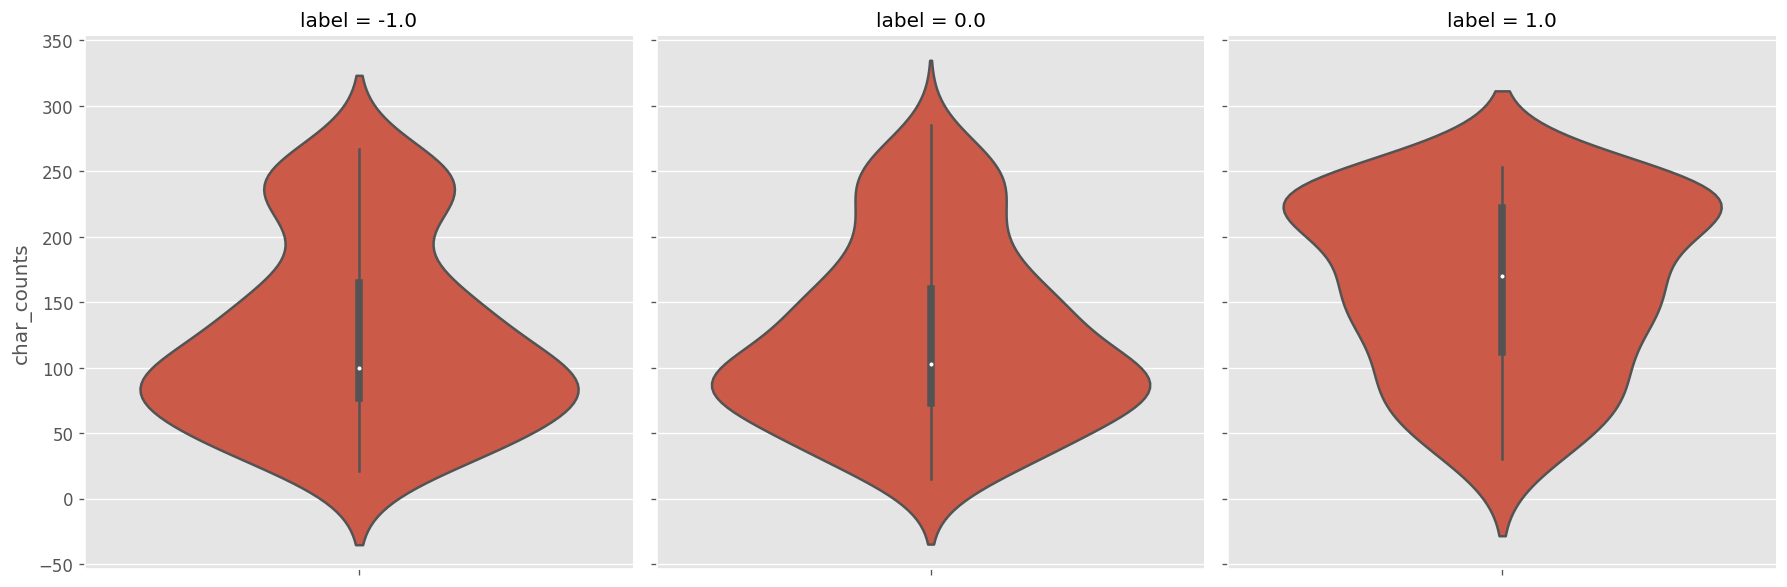

In [198]:
sns.catplot(y='char_counts', data=tweet, kind='violin', col='label')

Number of words, average word length, and stop words distribution in Tweet

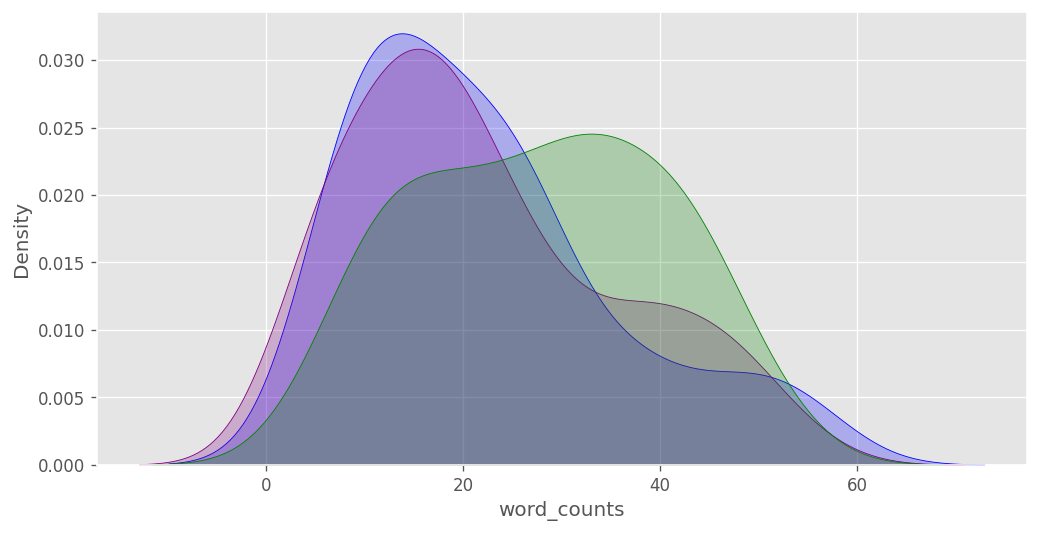

In [199]:
sns.kdeplot(tweet[tweet['label']==-1]['word_counts'], shade=True, color='blue') #blue shade for irrelevant tweets
sns.kdeplot(tweet[tweet['label']==0]['word_counts'], shade=True, color='purple') #purple shade for not-help-seeking-tweets
sns.kdeplot(tweet[tweet['label']==1]['word_counts'], shade=True, color='green') #green shade for help seeking tweets

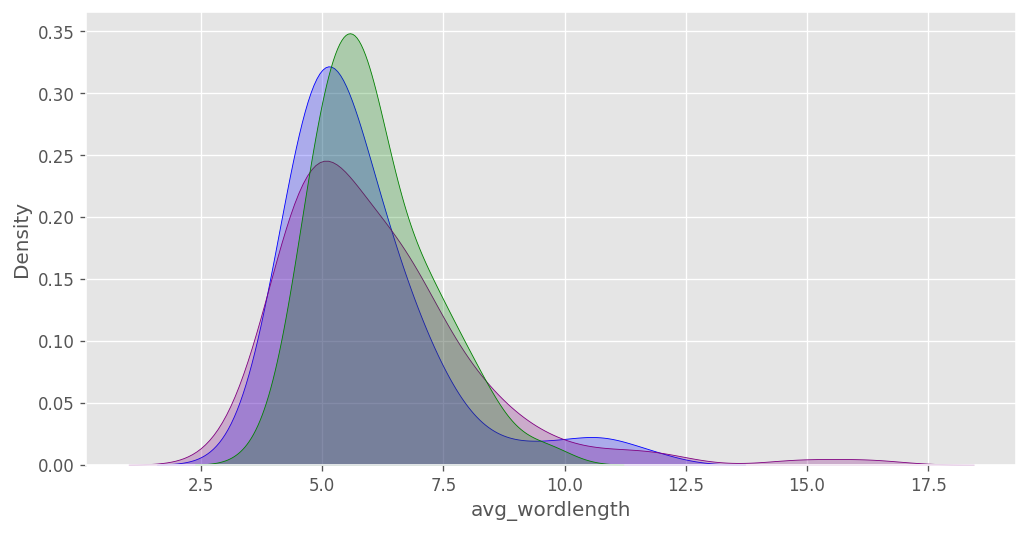

In [200]:
sns.kdeplot(tweet[tweet['label']==-1]['avg_wordlength'], shade=True, color='blue') #blue shade for irrelevant tweets
sns.kdeplot(tweet[tweet['label']==0]['avg_wordlength'], shade=True, color='purple') #purple shade for not-help-seeking-tweets
sns.kdeplot(tweet[tweet['label']==1]['avg_wordlength'], shade=True, color='green') #green shade for help seeking tweets

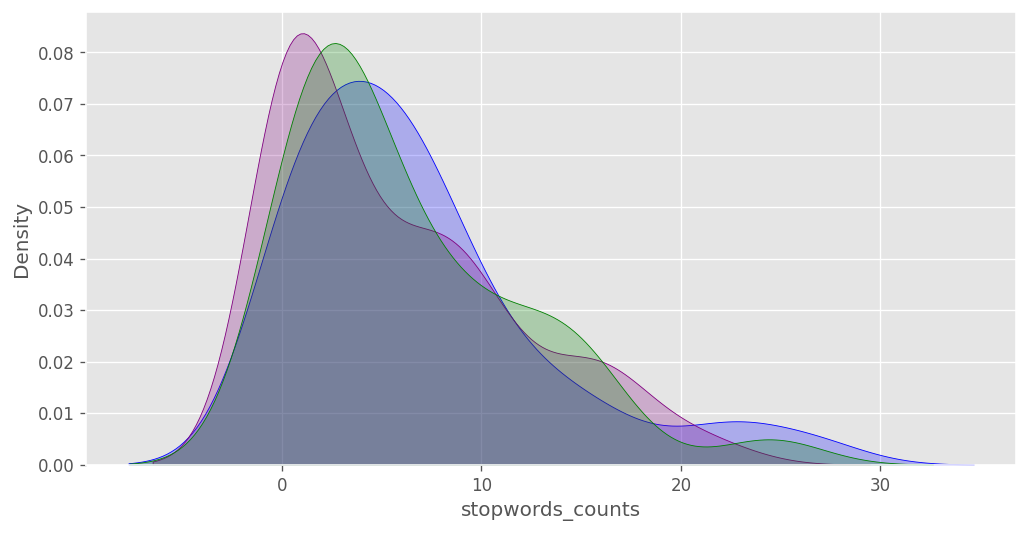

In [201]:
sns.kdeplot(tweet[tweet['label']==-1]['stopwords_counts'], shade=True, color='blue') #blue shade for irrelevant tweets
sns.kdeplot(tweet[tweet['label']==0]['stopwords_counts'], shade=True, color='purple') #purple shade for not-help-seeking-tweets
sns.kdeplot(tweet[tweet['label']==1]['stopwords_counts'], shade=True, color='green') #green shade for help seeking tweets

most and least common words

In [202]:
freqs = kgp.get_word_freqs(tweet, 'text')

In [203]:
top20 = freqs[:20]

<BarContainer object of 20 artists>

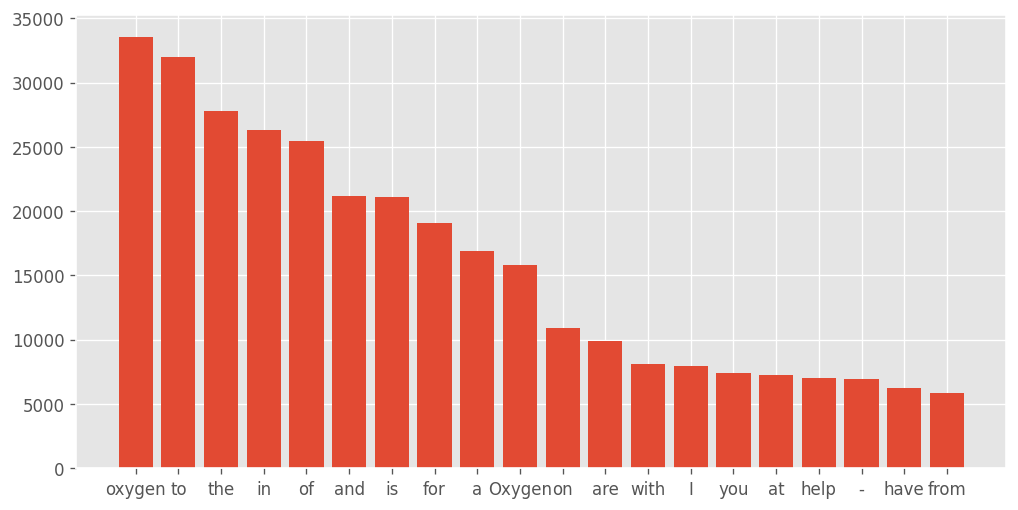

In [204]:
plt.bar(top20.index, top20.values)

In [205]:
least20 = freqs[-20:]
least20

#Muscle                    1
#Atrophy                   1
#DwightYorke               1
#customersfirst            1
@Cp275Matt                 1
@HanzlikJoe                1
@AbbyBurckhardt            1
@kstolie                   1
@troyatTHD                 1
https://t.co/GznUan6rmU    1
Harvey                     1
Prevents                   1
@davenewworld_2            1
scrubber                   1
@Ahmedei_                  1
mummified                  1
“Passengers”?              1
uncalled                   1
#Astaxanthin               1
10.Relation                1
dtype: int64

bigram analysis

In [206]:
bigram = kgp.get_ngram(tweet, 'text', ngram_range=2)

In [207]:
bigram[:20]

[('𝟲𝟮𝟮𝟮 𝟯𝟵𝟵𝟵', 659290),
 ('𝟯𝟵𝟵𝟵 https', 659289),
 ('𝟭𝟲𝟬 𝗘𝗹𝗲𝗰𝘁𝗿𝗼', 659288),
 ('𝟭𝟰𝟴 days', 659287),
 ('𝟬𝟳𝟬 𝟲𝟮𝟮𝟮', 659286),
 ('𝙏𝙚𝙖𝙢 𝙋𝙧𝙚𝙫𝙞𝙚𝙬', 659285),
 ('𝙋𝙧𝙚𝙫𝙞𝙚𝙬 northridge', 659284),
 ('𝙃𝙎 𝙏𝙚𝙖𝙢', 659283),
 ('𝘼𝙇 𝙃𝙎', 659282),
 ('𝘄𝗼𝗿𝗱 𝗼𝗳', 659281),
 ('𝘄𝗵𝘆 bjpdestroyedindia', 659280),
 ('𝘁𝗼 𝗹𝗮𝗰𝗸', 659279),
 ('𝘁𝗵𝗲 𝗠𝗼𝗱𝗶', 659278),
 ('𝗿𝗲𝗮𝗹𝗹𝘆 𝗛𝘂𝗿𝘁𝘀', 659277),
 ('𝗽𝗿𝗮𝘆 𝗳𝗼𝗿', 659276),
 ('𝗽𝗲𝗼𝗽𝗹𝗲 𝗮𝗿𝗲', 659275),
 ('𝗼𝘅𝘆𝗴𝗲𝗻 𝗯𝘂𝘁', 659274),
 ('𝗼𝗳 𝗽𝗲𝗼𝗽𝗹𝗲', 659273),
 ('𝗼𝗳 𝗼𝘅𝘆𝗴𝗲𝗻', 659272),
 ('𝗼𝗳 𝗰𝗮𝘂𝘁𝗶𝗼𝗻', 659271)]

Data Cleaning

In [208]:
def get_clean(x):
  x = str(x).lower().replace('\\',' ').replace('_',' ').replace('.',' ')
  x = kgp.cont_exp(x)
  x = kgp.remove_emails(x)
  x = kgp.remove_urls(x)
  x = kgp.remove_html_tags(x)
  x = kgp.remove_rt(x)
  x = kgp.remove_accented_chars(x)
  x = kgp.remove_special_chars(x)
  x = kgp.remove_dups_char(x)
  return x

In [209]:
tweet['text'] = tweet['text'].apply(lambda x: get_clean(x))

In [210]:
tweet.head()['text']

0    jackmathers4 janicedean how about the vaccines...
1    fordnation imagine the most populous province ...
2    arunbajpairajan ye bhi nhi per annum hota ki i...
3    calapooiariver patteepoo ilovezaatar dc draino...
4            nothoodlum or in a wheelchair with oxygen
Name: text, dtype: object

In [211]:
kgp.get_ngram(tweet, 'text', ngram_range=2) #cleaned data bigram analysis

[('zzy7krxtyu8inbd dear', 631723),
 ('zzap but', 631722),
 ('zz itsniyazking', 631721),
 ('zyzick1 azcompass', 631720),
 ('zyli najlepsze', 631719),
 ('zydushospitals visit', 631718),
 ('zydushospitals jaipur', 631717),
 ('zydus virafin', 631716),
 ('zydus verafin', 631715),
 ('zydus panindia', 631714),
 ('zydus oxygencrisis', 631713),
 ('zydus hospital', 631712),
 ('zydus gets', 631711),
 ('zydus dvara', 631710),
 ('zydus drug', 631709),
 ('zydus cadilas', 631708),
 ('zyada zrurt', 631707),
 ('zyada zarurat', 631706),
 ('zyada share', 631705),
 ('zyada search', 631704),
 ('zyada se', 631703),
 ('zyada patients', 631702),
 ('zyada oxygen', 631701),
 ('zyada nahi', 631700),
 ('zyada madad', 631699),
 ('zyada log', 631698),
 ('zyada kya', 631697),
 ('zyada kharab', 631696),
 ('zyada intake', 631695),
 ('zyada ho', 631694),
 ('zyada hai', 631693),
 ('zyada gyan', 631692),
 ('zyada gas', 631691),
 ('zyada dikkat', 631690),
 ('zyada chinta', 631689),
 ('zyada altitude', 631688),
 ('zy javer

Word Visualization with Word Cloud

In [212]:
#frequency of words which are actually relevant to the problem statement
freqs  #this talks about the combination of all tweets and not just help-seeking ones

oxygen           33556
to               32010
the              27802
in               26303
of               25446
                 ...  
mummified            1
“Passengers”?        1
uncalled             1
#Astaxanthin         1
10.Relation          1
Length: 234114, dtype: int64

In [213]:
actual_freqs = kgp.get_word_freqs(tweet[tweet['label']==1], 'text')
actual_freqs

oxygen             75
in                 50
help               31
and                29
for                28
                   ..
biharhealthdept     1
districts           1
major               1
medicine            1
garden              1
Length: 676, dtype: int64

In [214]:
actual_freqs = ' '.join(actual_freqs.index)
actual_freqs

'oxygen in help and for is of please cylinder need to patient name hospital urgent no contact a sir srinivasiyc are bed my covid with you the rajesh needs her medical level httpst age any who father ventilator she delhi if all serious i admitted pls sonusood his positive 831020 jamshedpur collegehospital mgm on son it jharkhand friend condition pandey has me good morning am shankar kumarson get 42 writing request gas pandeyage supply 2 narendramodi requirement arvindkejriwal at more urgently he beds but anyone today we husband they barwani 1 can not india verma bharti covidemergency cg 52 ashok number919609569511 country loses use address 8285 family mobile call durgbhilai people our faridabad required arrange plz out ind needed levels patients corona kisi home support kapilmishra drharshvardhan have this saroj bihar rohini bhi getting from odisha 91 situation him provide hospitals or someone covid19india lucknow system be may as jain o2 collectorbarwani will sunita kindly rani lal 56 

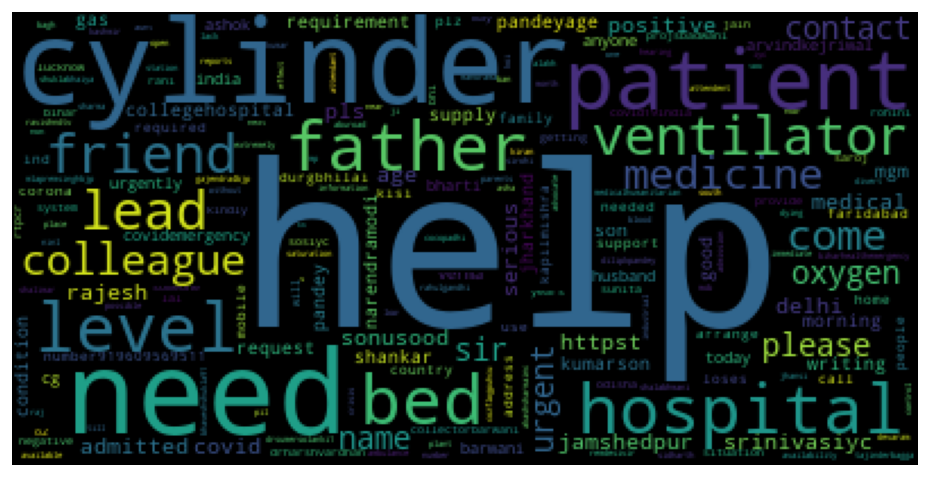

In [215]:
word_cloud = WordCloud(max_font_size=100).generate(actual_freqs)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [216]:
# not-help-seeking word frequency
not_actual_freqs = kgp.get_word_freqs(tweet[tweet['label']==-1], 'text')
not_actual_freqs

the             60
a               50
is              41
to              41
httpst          34
                ..
authentic        1
squire           1
takes            1
plaudits         1
coqvrvno6m1w     1
Length: 1119, dtype: int64

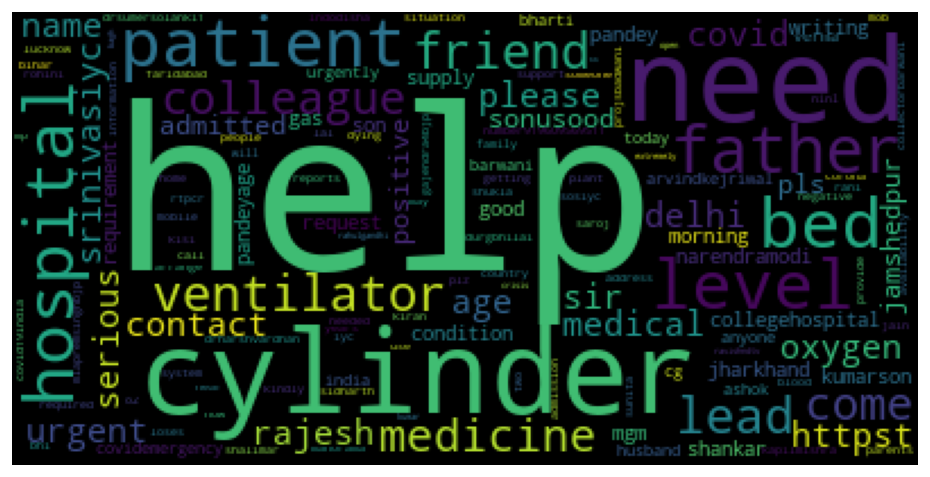

In [217]:
word_cloud = WordCloud(max_font_size=100).generate(actual_freqs)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [218]:
#not-help-seeking
not_actual_freqs = kgp.get_word_freqs(tweet[tweet['label']==0], 'text')
not_actual_freqs

oxygen           135
the               60
to                58
in                48
httpst            45
                ... 
year               1
wellesley          1
ruining            1
glasses            1
whatashithole      1
Length: 1409, dtype: int64

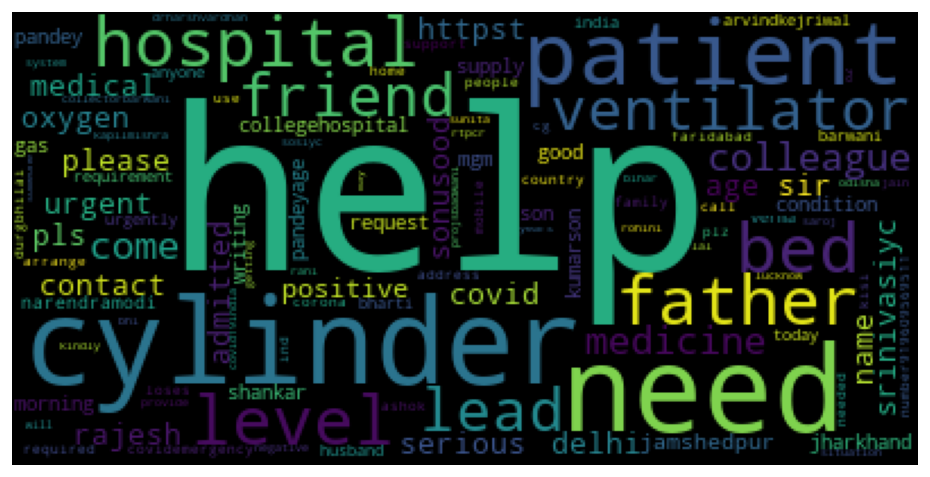

In [219]:
word_cloud = WordCloud(max_font_size=100).generate(actual_freqs)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

Classification with TF-IDF and SVM

> 



In [220]:
text = tweet1['text']
y = tweet1['label']

In [221]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(text)

In [222]:
X.shape  #135713 is the total no of tokenizers/features calculated by tfidf

(315, 2723)

In [223]:
X #sparse matrix have less no of non zero values and most of the values are zero

<315x2723 sparse matrix of type '<class 'numpy.float64'>'
	with 6465 stored elements in Compressed Sparse Row format>

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [225]:
def run_SVM(clf, X_train, X_test, y_train, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  print()
  print('Classification Report')
  print(classification_report(y_test, y_pred))

In [226]:
from sklearn.svm import LinearSVC

In [227]:
clf = LinearSVC()
run_SVM(clf, X_train, X_test, y_train, y_test)


Classification Report
              precision    recall  f1-score   support

        -1.0       0.91      0.50      0.65        20
         0.0       0.67      0.94      0.78        31
         1.0       0.89      0.67      0.76        12

    accuracy                           0.75        63
   macro avg       0.82      0.70      0.73        63
weighted avg       0.79      0.75      0.74        63



In [228]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
'''
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['linear']}

grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)
'''
#applying Gridsearchcv to find the best model

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}

Classification with Word2Vec and SVM

In [229]:
!python -m spacy download en_core_web_lg 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [230]:
import spacy
import en_core_web_lg

In [231]:
nlp = en_core_web_lg.load()

In [232]:
def get_vec(x):
  doc = nlp(x)
  vec = doc.vector
  return vec

In [233]:
tweet1['vec'] = tweet1['text'].apply(lambda x: get_vec(x))

In [234]:
tweet1.head()

Unnamed: 0                                               text  label  \
0           0  @jackmathers4 @JaniceDean How about the vaccin...    0.0   
1           1  @fordnation Imagine the most populous province...   -1.0   
2           2  @arunbajpairajan Ye bhi nhi pta hota ki iopec ...   -1.0   
3           3  @CalapooiaRiver @patteepoo @Ilovezaatar @DC_Dr...    0.0   
4           4      @NotHoodlum Or in a wheelchair....with Oxygen    0.0   

                                                 vec  
0  [-0.81544834, 1.9529328, -3.7098181, 0.4371903...  
1  [-0.3453807, 2.2345808, -3.0399063, -0.4104342...  
2  [-0.25224957, 1.5075833, -0.94456327, -0.04241...  
3  [0.7677988, 3.3840053, -3.403398, -0.7372714, ...  
4  [-2.4327161, 2.1245327, -2.179547, 0.69457495,...

In [235]:
X = tweet1['vec'].to_numpy()
X = X.reshape(-1, 1)

In [236]:
X

array([[array([-0.81544834,  1.9529328 , -3.7098181 ,  0.43719032,  3.0401428 ,
                0.57476336, -0.08381892,  2.4873416 , -1.5484668 ,  1.3751838 ,
                3.5868943 ,  1.8338116 , -3.9651504 ,  1.8873268 , -0.15604216,
                0.5894781 ,  1.4102173 , -2.6246607 , -1.0569446 , -1.7287952 ,
                0.9525614 , -0.9378008 ,  0.19333011, -1.1349114 , -0.88611186,
               -0.7016291 , -2.4942784 , -1.0089486 , -0.45377004,  1.3143827 ,
                2.0466995 , -0.14286147,  0.80053574, -0.4575059 , -1.5142392 ,
                0.18806599,  0.283075  ,  0.24831863,  2.4974473 ,  0.9710972 ,
               -0.6221001 ,  0.6866627 ,  0.9324613 , -0.3284395 , -2.1396763 ,
               -0.52148426,  0.9805421 , -2.4031425 , -1.6815467 ,  1.7924763 ,
               -0.3069764 ,  0.5575318 ,  0.9358612 , -4.2608457 , -0.9858747 ,
                1.0027641 , -0.981056  ,  0.35400915,  0.7844868 ,  1.3245282 ,
                0.670909  , -0.64155   ,

In [237]:
X.shape

(315, 1)

In [238]:
X = np.concatenate(np.concatenate(X, axis=0), axis=0).reshape(-1, 300)

In [239]:
X.shape

(315, 300)

In [240]:
y = tweet1['label']

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [242]:
%%time
clf = LinearSVC()
run_SVM(clf, X_train, X_test, y_train, y_test)


Classification Report
              precision    recall  f1-score   support

        -1.0       0.62      0.65      0.63        20
         0.0       0.72      0.68      0.70        31
         1.0       0.69      0.75      0.72        12

    accuracy                           0.68        63
   macro avg       0.68      0.69      0.68        63
weighted avg       0.68      0.68      0.68        63

CPU times: user 357 ms, sys: 2.8 ms, total: 360 ms
Wall time: 377 ms


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Word2Vec has secured 70% accuracy whereas TF-IDF secured 75%. This decrease is due to the fact that Word2ec works with words those are in Spacy and Spacy has been trained on standard English, not twitter data which is mostly mis-spelled words or contracted words etc.

Apply random forest, xgboost, logistic regression to tune hyperparameters and improve accuracy

Word Embedding and Classification in Deep Learning

In [243]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

In [244]:
text

0      @jackmathers4 @JaniceDean How about the vaccin...
1      @fordnation Imagine the most populous province...
2      @arunbajpairajan Ye bhi nhi pta hota ki iopec ...
3      @CalapooiaRiver @patteepoo @Ilovezaatar @DC_Dr...
4          @NotHoodlum Or in a wheelchair....with Oxygen
                             ...                        
310    Name : Sanjay Gupta Number : 8303201364 Requir...
311    @srinivasiyc Sir, a colleague's parents (79 &a...
312    @msisodia @ArvindKejriwal Sir jab logo ko oxyg...
313    Many in this covid crisis are left with only o...
314    One cow to be sent to every patient in ICU bec...
Name: text, Length: 315, dtype: object

In [245]:
token = Tokenizer()
token.fit_on_texts(text)

In [246]:
vocab_size = len(token.word_index)+1
vocab_size

2952

In [247]:
print(token.word_index)

{'oxygen': 1, 'the': 2, 'in': 3, 'to': 4, 'a': 5, 'is': 6, 'of': 7, 'and': 8, 't': 9, 'co': 10, 'https': 11, 'for': 12, 'on': 13, 'cylinder': 14, 'you': 15, 'with': 16, 'i': 17, 'help': 18, 'my': 19, 'this': 20, 'covid': 21, 'it': 22, 'need': 23, 'all': 24, 'ventilator': 25, 'please': 26, 'amp': 27, 'are': 28, 'bed': 29, 'no': 30, 'hospital': 31, 'her': 32, 'be': 33, 'have': 34, 'as': 35, 'that': 36, 'patient': 37, 'they': 38, 'so': 39, 'at': 40, 'cylinders': 41, 'can': 42, 'get': 43, 'out': 44, 'me': 45, 'contact': 46, 'was': 47, 'your': 48, 'generating': 49, 'his': 50, 'sir': 51, 'name': 52, 'we': 53, 'but': 54, 'not': 55, 'from': 56, 'if': 57, 'like': 58, 'है': 59, 'he': 60, 'an': 61, 'urgent': 62, 'now': 63, 'more': 64, 'beds': 65, 'one': 66, 'just': 67, 'has': 68, 'she': 69, 'people': 70, '2': 71, 'being': 72, 'age': 73, 'medical': 74, 'or': 75, 'who': 76, 'available': 77, 'srinivasiyc': 78, 'up': 79, 'today': 80, 'any': 81, 'will': 82, 'level': 83, 'think': 84, 'needs': 85, 'gas'

In [248]:
encoded_text = token.texts_to_sequences(text)

In [249]:
print(encoded_text)

[[895, 896, 131, 154, 2, 897, 101, 40, 476, 898, 329, 47, 477, 4, 43, 5, 899, 102, 44], [900, 901, 2, 902, 903, 904, 478, 24, 41, 155, 63, 53, 187, 905, 244, 4, 906, 20, 79, 907], [908, 188, 156, 330, 909, 910, 110, 911, 331, 111, 912, 913, 112, 14, 479, 480, 45, 914, 188, 915, 156, 916, 2], [917, 918, 919, 245, 920, 921, 481, 922, 482, 30, 1, 42, 43, 189, 48, 132, 332, 133, 483, 15, 84, 5, 484, 333], [246, 75, 3, 5, 923, 16, 1], [924, 925, 17, 157, 84, 485, 66, 7, 103, 28, 134, 247, 1, 158, 926, 28, 927, 159, 67, 928, 5, 1, 160, 16, 15], [20, 929, 6, 486, 161, 13, 24, 41, 930], [190, 931, 932, 933, 24, 41, 12, 45, 934, 6, 155], [935, 334, 13, 19, 335, 936, 2, 25, 6, 937, 4, 248, 32, 1, 938, 8, 19, 939, 68, 63, 487, 113, 12, 21, 26, 940, 12, 103, 35, 38, 336, 2, 484, 488, 53, 191, 15, 39, 114, 12, 2, 941, 942], [17, 337, 19, 94, 943, 489, 80, 22, 47, 39, 114, 490, 8, 19, 14, 944, 44, 39, 95, 190, 491, 945, 492, 946, 2, 66, 3, 2, 947, 190, 948, 249, 949, 17, 950, 4, 951, 19, 952, 953, 1

In [250]:
max_length = 75
X =pad_sequences(encoded_text, maxlen = max_length, padding='post')

In [251]:
print(X)

[[895 896 131 ...   0   0   0]
 [900 901   2 ...   0   0   0]
 [908 188 156 ...   0   0   0]
 ...
 [879 167  51 ...   0   0   0]
 [267   3  20 ...   0   0   0]
 [ 66 894   4 ...   0   0   0]]


In [252]:
X.shape

(315, 75)

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [254]:
%%time
clf = LinearSVC()
run_SVM(clf, X_train, X_test, y_train, y_test)


Classification Report
              precision    recall  f1-score   support

        -1.0       0.19      0.25      0.21        20
         0.0       0.31      0.16      0.21        31
         1.0       0.15      0.25      0.19        12

    accuracy                           0.21        63
   macro avg       0.22      0.22      0.20        63
weighted avg       0.24      0.21      0.21        63

CPU times: user 80.1 ms, sys: 0 ns, total: 80.1 ms
Wall time: 109 ms


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


v low accuracy obtained on linear svm after tokenization using deep learning

In [255]:
#prep CNN model
vec_size = 100
model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length = max_length))

model.add(Conv1D(32, 2, activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(16, activation = 'relu'))

model.add(GlobalMaxPooling1D())

model.add(Dense(1, activation = 'softmax'))

In [256]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 75, 100)           295200    
                                                                 
 conv1d_1 (Conv1D)           (None, 74, 32)            6432      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 37, 32)           0         
 1D)                                                             
                                                                 
 dropout_113 (Dropout)       (None, 37, 32)            0         
                                                                 
 dense_3 (Dense)             (None, 37, 32)            1056      
                                                                 
 dropout_114 (Dropout)       (None, 37, 32)            0         
                                                      

In [257]:
%%time
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
8/8 [==============================] - 1s 41ms/step - loss: 0.0000e+00 - accuracy: 0.2024 - val_loss: 0.0000e+00 - val_accuracy: 0.1905
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.2024 - val_loss: 0.0000e+00 - val_accuracy: 0.1905
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 0.2024 - val_loss: 0.0000e+00 - val_accuracy: 0.1905
Epoch 4/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0000e+00 - accuracy: 0.2024 - val_loss: 0.0000e+00 - val_accuracy: 0.1905
Epoch 5/100
8/8 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - accuracy: 0.2024 - val_loss: 0.0000e+00 - val_accuracy: 0.1905
Epoch 6/100
8/8 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 0.2024 - val_loss: 0.0000e+00 - val_accuracy: 0.1905
Epoch 7/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 0.2024 - val_loss:

In [258]:
def get_encoded(x):
  x = get_clean(x)
  x = token.texts_to_sequences([x])
  x = pad_sequences(x, maxlen=max_length, padding='post')
  return x


In [259]:
x = 'I hope none of the MSM broadcast the precious guy’s remarks on Sunday. Don’t give him any oxygen! #CPAC2021 #GoldenCalf'
vec = get_encoded(x)

In [260]:
vec

array([[ 17, 975, 976,   7,   2, 977, 978,   2, 979, 405, 981,  13, 982,
        194, 339,  81,   1, 983, 984,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=int32)

In [261]:
np.argmax(model.predict(vec), axis = -1) #this means that the tweet tested is zero, i.e. 

1/1 [==============================] - 0s 228ms/step


array([0])

In [262]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [263]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [264]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.43      0.45      0.44        20
         0.0       0.46      0.52      0.48        31
         1.0       0.29      0.17      0.21        12

    accuracy                           0.43        63
   macro avg       0.39      0.38      0.38        63
weighted avg       0.42      0.43      0.42        63



In [265]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]
clf = GridSearchCV(classifier , forest_params, cv = 10, scoring='accuracy')

clf.fit(X_train, y_train)

print(clf.best_params_)

print(clf.best_score_)

{'max_depth': 11, 'max_features': 7}
0.572


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", 

In [266]:
print(clf.best_score_)

0.572


In [267]:
# XG Boost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


In [268]:
model.fit(X_train, y_train)


XGBClassifier(eval_metric='mlogloss', objective='multi:softprob',
              use_label_encoder=False)

In [269]:
y_pred = model.predict(X_test)

In [270]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.5238095238095238

In [271]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval

param_grid = { 
    # Percentage of columns to be randomly samples for each tree.
    "colsample_bytree": [ 0.3, 0.5 , 0.8 ],
    # reg_alpha provides l1 regularization to the weight, higher values result in more conservative models
    "reg_alpha": [0, 0.5, 1, 5],
    # reg_lambda provides l2 regularization to the weight, higher values result in more conservative models
    "reg_lambda": [0, 0.5, 1, 5]
    }
# Set up score
scoring = ['recall']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

In [272]:
# Define grid search
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           scoring=scoring, 
                           refit='recall', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
grid_result = grid_search.fit(X_train, y_train)
# Print grid search summary
grid_result

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             estimator=XGBClassifier(eval_metric='mlogloss',
                                     objective='multi:softprob',
                                     use_label_encoder=False),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.5, 0.8],
                         'reg_alpha': [0, 0.5, 1, 5],
                         'reg_lambda': [0, 0.5, 1, 5]},
             refit='recall', scoring=['recall'])

In [273]:
# Print the best score and the corresponding hyperparameters
print(f'The best score is {grid_result.best_score_:.4f}')
print('The best score standard deviation is', round(grid_result.cv_results_['std_test_recall'][grid_result.best_index_], 4))
print(f'The best hyperparameters are {grid_result.best_params_}')

The best score is nan
The best score standard deviation is nan
The best hyperparameters are {'colsample_bytree': 0.3, 'reg_alpha': 0, 'reg_lambda': 0}


In [274]:
from sklearn.metrics import precision_recall_fscore_support as score
# Make prediction using the best model
grid_predict = grid_search.predict(X_test)
# Get predicted probabilities
grid_predict_prob = grid_search.predict_proba(X_test)[:,1]
# Get performance metrics
precision, recall, fscore, support = score(y_test, grid_predict)
# Print result
print(f'The recall value for the xgboost grid search is {recall[1]:.4f}')

The recall value for the xgboost grid search is 0.6774


In [275]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [276]:
y_pred = classifier.predict(X_test)

In [277]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 4 14  2]
 [ 9 17  5]
 [ 1  7  4]]


0.3968253968253968

In [278]:
'''from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
clf = GridSearchCV(classifier, 
                   param_grid = parameters,
                   scoring = 'accuracy', 
                   cv = 10)
clf.fit(X,y)'''

"from sklearn.model_selection import GridSearchCV\nimport warnings\nwarnings.filterwarnings('ignore')\n# parameter grid\nparameters = {\n    'penalty' : ['l1','l2'], \n    'C'       : np.logspace(-3,3,7),\n    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],\n}\nclf = GridSearchCV(classifier, \n                   param_grid = parameters,\n                   scoring = 'accuracy', \n                   cv = 10)\nclf.fit(X,y)"

In [279]:
'''clf = GridSearchCV(classifier,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds'''

"clf = GridSearchCV(classifier,                    # model\n                   param_grid = parameters,   # hyperparameters\n                   scoring='accuracy',        # metric for scoring\n                   cv=10)                     # number of folds"

In [280]:
'''print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)'''

'print("Tuned Hyperparameters :", clf.best_params_)\nprint("Accuracy :",clf.best_score_)'

Bert model

In [281]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [282]:
tweet1.head()

Unnamed: 0                                               text  label  \
0           0  @jackmathers4 @JaniceDean How about the vaccin...    0.0   
1           1  @fordnation Imagine the most populous province...   -1.0   
2           2  @arunbajpairajan Ye bhi nhi pta hota ki iopec ...   -1.0   
3           3  @CalapooiaRiver @patteepoo @Ilovezaatar @DC_Dr...    0.0   
4           4      @NotHoodlum Or in a wheelchair....with Oxygen    0.0   

                                                 vec  
0  [-0.81544834, 1.9529328, -3.7098181, 0.4371903...  
1  [-0.3453807, 2.2345808, -3.0399063, -0.4104342...  
2  [-0.25224957, 1.5075833, -0.94456327, -0.04241...  
3  [0.7677988, 3.3840053, -3.403398, -0.7372714, ...  
4  [-2.4327161, 2.1245327, -2.179547, 0.69457495,...

In [283]:
tweet1.drop(['vec'], axis = 1)

Unnamed: 0                                               text  label
0             0  @jackmathers4 @JaniceDean How about the vaccin...    0.0
1             1  @fordnation Imagine the most populous province...   -1.0
2             2  @arunbajpairajan Ye bhi nhi pta hota ki iopec ...   -1.0
3             3  @CalapooiaRiver @patteepoo @Ilovezaatar @DC_Dr...    0.0
4             4      @NotHoodlum Or in a wheelchair....with Oxygen    0.0
..          ...                                                ...    ...
310         413  Name : Sanjay Gupta Number : 8303201364 Requir...    1.0
311         414  @srinivasiyc Sir, a colleague's parents (79 &a...    1.0
312         415  @msisodia @ArvindKejriwal Sir jab logo ko oxyg...    0.0
313         416  Many in this covid crisis are left with only o...    0.0
314         417  One cow to be sent to every patient in ICU bec...    0.0

[315 rows x 3 columns]

In [284]:
tweet1.loc[tweet1['label'] == -1.0, 'label'] = 2.0

In [285]:
tweet1

Unnamed: 0                                               text  label  \
0             0  @jackmathers4 @JaniceDean How about the vaccin...    0.0   
1             1  @fordnation Imagine the most populous province...    2.0   
2             2  @arunbajpairajan Ye bhi nhi pta hota ki iopec ...    2.0   
3             3  @CalapooiaRiver @patteepoo @Ilovezaatar @DC_Dr...    0.0   
4             4      @NotHoodlum Or in a wheelchair....with Oxygen    0.0   
..          ...                                                ...    ...   
310         413  Name : Sanjay Gupta Number : 8303201364 Requir...    1.0   
311         414  @srinivasiyc Sir, a colleague's parents (79 &a...    1.0   
312         415  @msisodia @ArvindKejriwal Sir jab logo ko oxyg...    0.0   
313         416  Many in this covid crisis are left with only o...    0.0   
314         417  One cow to be sent to every patient in ICU bec...    0.0   

                                                   vec  
0    [-0.81544834, 1.9529328, -3.7098181, 0.4371903...  
1    [-0.3453807, 2.2345808, -3.0399063, -0.4104342...  
2    [-0.25224957, 1.5075833, -0.94456327, -0.04241...  
3    [0.7677988, 3.3840053, -3.403398, -0.7372714, ...  
4    [-2.4327161, 2.1245327, -2.179547, 0.69457495,...  
..                                                 ...  
310  [0.6181233, -0.84512836, 0.6314671, -0.8851357...  
311  [-1.616551, -1.3451083, -0.82435, -0.40204713,...  
312  [-0.14716575, 1.1990035, -0.7644809, -0.421593...  
313  [0.51553935, 1.4218016, 0.3206338, 1.0666988, ...  
314  [0.30707514, 2.3856304, -1.368962, -0.28759778...  

[315 rows x 4 columns]

In [286]:
tweet1.drop(['vec'], axis = 1)

Unnamed: 0                                               text  label
0             0  @jackmathers4 @JaniceDean How about the vaccin...    0.0
1             1  @fordnation Imagine the most populous province...    2.0
2             2  @arunbajpairajan Ye bhi nhi pta hota ki iopec ...    2.0
3             3  @CalapooiaRiver @patteepoo @Ilovezaatar @DC_Dr...    0.0
4             4      @NotHoodlum Or in a wheelchair....with Oxygen    0.0
..          ...                                                ...    ...
310         413  Name : Sanjay Gupta Number : 8303201364 Requir...    1.0
311         414  @srinivasiyc Sir, a colleague's parents (79 &a...    1.0
312         415  @msisodia @ArvindKejriwal Sir jab logo ko oxyg...    0.0
313         416  Many in this covid crisis are left with only o...    0.0
314         417  One cow to be sent to every patient in ICU bec...    0.0

[315 rows x 3 columns]

In [287]:
tweet1['label'].value_counts()

0.0    153
2.0     99
1.0     63
Name: label, dtype: int64

In [288]:
from ktrain import text
import ktrain

In [289]:
tweet1['label'] = tweet1['label'].astype(int)

In [290]:
#(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(train_df = tweet1, text_column = 'text', label_columns = 'label', maxlen = 80, preprocess_mode='bert')

In [291]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [292]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import tensorflow as tf
from transformers import BertTokenizer

In [293]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [294]:
tweet1['text'].iloc[0]

'@jackmathers4 @JaniceDean How about the vaccines? Ventilators? At least President Trump was able to get a stimulus check out.'

In [295]:
token = tokenizer.encode_plus(
    tweet1['text'].iloc[0],
    max_length=80,
    truncation = True,
    padding='max_length',
    add_special_tokens=True, 
    return_tensors='tf'
)

In [296]:
token

{'input_ids': <tf.Tensor: shape=(1, 80), dtype=int32, numpy=
array([[  101,   137, 24498, 21943, 20765,  1527,   137, 21872,  2137,
         7766,  1731,  1164,  1103, 20034,  1116,   136,   159,  3452,
         8009,  5067,   136,  1335,  1655,  1697,  8499,  1108,  1682,
         1106,  1243,   170, 21950,  4031,  1149,   119,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0]],
      dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1, 80), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [297]:
X_input_ids = np.zeros((len(tweet1), 80))
X_attn_masks = np.zeros((len(tweet1), 80))

In [298]:
X_input_ids.shape

(315, 80)

In [299]:
def generate_training_data(df, ids, masks, tokenizer):
  for i, text in tqdm(enumerate(tweet1['text'])):
    tokenized_text = tokenizer.encode_plus(
        text,
        max_length=80,
        truncation = True,
        padding='max_length',
        add_special_tokens=True, 
        return_tensors='tf'
    )
    ids[i, :] = tokenized_text.input_ids
    masks[i, :] = tokenized_text.attention_mask
  return ids, masks    

In [300]:
X_input_ids, X_attn_masks = generate_training_data(tweet1, X_input_ids, X_attn_masks, tokenizer)

0it [00:00, ?it/s]

In [301]:
X_input_ids

array([[  101.,   137., 24498., ...,     0.,     0.,     0.],
       [  101.,   137.,  1111., ...,     0.,     0.,     0.],
       [  101.,   137.,   170., ...,     0.,     0.,     0.],
       ...,
       [  101.,   137.,   182., ..., 17784.,  1348.,   102.],
       [  101.,  2408.,  1107., ...,     0.,     0.,     0.],
       [  101.,  1448., 13991., ...,     0.,     0.,     0.]])

In [302]:
labels = np.zeros((len(tweet1), 3))
labels.shape

(315, 3)

In [303]:
labels[np.arange(len(tweet1)), tweet1['label'].values] = 1

In [304]:
labels

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0

In [305]:
dataset = tf.data.Dataset.from_tensor_slices((X_input_ids, X_attn_masks, labels))

In [306]:
dataset.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(80,), dtype=tf.float64, name=None), TensorSpec(shape=(80,), dtype=tf.float64, name=None), TensorSpec(shape=(3,), dtype=tf.float64, name=None))>

In [307]:
def map_func(input_ids, attn_masks, labels):
  return{
      'input_ids': input_ids,
      'attention_mask': attn_masks
  }, labels

In [308]:
dataset = dataset.map(map_func)

In [309]:
dataset.take(1)

<TakeDataset element_spec=({'input_ids': TensorSpec(shape=(80,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(80,), dtype=tf.float64, name=None)}, TensorSpec(shape=(3,), dtype=tf.float64, name=None))>

In [310]:
dataset = dataset.shuffle(10000).batch(4, drop_remainder = True)

In [311]:
p = 0.8
train_size = int((len(tweet1)//4)*p)

In [312]:
train_size

62

In [313]:
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

In [314]:
from transformers import TFBertModel
bert_model = TFBertModel.from_pretrained('bert-base-cased')

In [315]:
input_ids = tf.keras.layers.Input(shape=(80,), name = 'input_ids', dtype='int32')
attention_masks = tf.keras.layers.Input(shape=(80,), name = 'attention_mask', dtype='int32')

bert_embds = bert_model.bert(input_ids, attention_mask = attention_masks)[1]
intermediate_layer = tf.keras.layers.Dense(160, activation='relu', name='intermediate_layer')(bert_embds)
output_layer = tf.keras.layers.Dense(3, activation='softmax', name='output_layer')(intermediate_layer)

model = tf.keras.Model(inputs=[input_ids, attention_masks], outputs=output_layer)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 80)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 80)]         0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 80,                                          

In [316]:
optim = tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-6)
loss_func=tf.keras.losses.CategoricalCrossentropy()
acc=tf.keras.metrics.CategoricalAccuracy('accuracy')

In [317]:
model.compile(optimizer=optim, loss=loss_func, metrics=[acc])

In [331]:
hist = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=2
)

Epoch 1/2
62/62 [==============================] - 6s 101ms/step - loss: 0.0564 - accuracy: 0.9879 - val_loss: 0.0370 - val_accuracy: 0.9844
Epoch 2/2
62/62 [==============================] - 7s 105ms/step - loss: 0.0135 - accuracy: 0.9960 - val_loss: 0.0024 - val_accuracy: 1.0000


In [319]:
model.save('tweet_model')

In [320]:
loaded_model = tf.keras.models.load_model('tweet_model')

In [321]:
input_text = 'First vaccine dose done! I can already feel my superpowers generating'

In [322]:
def prepare_data(input_text, tokenizer):
  token = tokenizer.encode_plus(
      input_text,
      max_length = 80,
      truncation = True,
      padding = 'max_length',
      add_special_tokens = True,
      return_tensors = 'tf'
  )
  return{
      'input_ids': tf.cast(token.input_ids, tf.float64),
      'attention_mask': tf.cast(token.input_ids, tf.float64)
  }

In [323]:
tokenized_input_text = prepare_data(input_text, tokenizer)

In [324]:
tokenized_input_text

{'input_ids': <tf.Tensor: shape=(1, 80), dtype=float64, numpy=
 array([[  101.,  1752., 20034., 13753.,  1694.,   106.,   146.,  1169.,
          1640.,  1631.,  1139.,  7688.,  9447.,  1116., 12713.,   102.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.]])>,
 'attention_mask': <tf.Tensor: shape=(1, 80), dtype=float64, numpy=
 array([[  101.,  1752., 20034., 13753.,  1694.,   106.,   146.,  1169.,
          1640.,  1631.,  1139.,  7688.,  9447.,  1116., 12713

In [325]:
probs = loaded_model.predict(tokenized_input_text)

1/1 [==============================] - 3s 3s/step


In [326]:
probs

array([[0.31559595, 0.527386  , 0.15701807]], dtype=float32)

In [327]:
classes = ['not-help-seeking', 'not-relevant', 'help-seeking']

In [328]:
output_index = np.argmax(probs[0])
print(classes[output_index])

not-relevant
